# This notebook plots spatial predictions
This notebook reads in the prediction shapefiles, along with `.tif` images of isochore thicknesses for the two formations and plots them along with the surface geology exposures of the Eastern Greater Green River Basin.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap
import rasterio
import rasterio.plot
from rasterio.warp import calculate_default_transform, reproject, Resampling
import geopandas as gpd


In [2]:
%matplotlib inline

In [3]:
TFUWELLS = gpd.read_file(r"predictions\ftunion_predictions_prob.shp")
KLAWELLS = gpd.read_file(r"predictions\lance_predictions_prob.shp")
LANCE = gpd.read_file(r"base_data\shapefiles\lance_outcrop.shp")
FTUN = gpd.read_file(r"base_data\shapefiles\ftunion_outcrop.shp")
FAULTS = gpd.read_file(r"base_data\shapefiles\simp_faults.shp")
SECTIONS = gpd.read_file(r"base_data\shapefiles\crossection.shp",)

In [4]:
DST_CRS = "EPSG:4326"

with rasterio.open(r"base_data\lance2864.tif") as src:
    TRANSFORM, WIDTH, HEIGHT = calculate_default_transform(
        src.crs, DST_CRS, src.width, src.height, *src.bounds
    )
    kwargs = src.meta.copy()
    kwargs.update(
        {"crs": DST_CRS, "transform": TRANSFORM, "width": WIDTH, "height": HEIGHT}
    )

    with rasterio.open(r"base_data\lance2864_reproject.tif", "w", **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=TRANSFORM,
                DST_CRS=DST_CRS,
                resampling=Resampling.nearest,
            )

with rasterio.open(r"base_data\ftunion2864.tif") as src:
    TRANSFORM, WIDTH, HEIGHT = calculate_default_transform(
        src.crs, DST_CRS, src.width, src.height, *src.bounds
    )
    kwargs = src.meta.copy()
    kwargs.update(
        {"crs": DST_CRS, "transform": TRANSFORM, "width": WIDTH, "height": HEIGHT}
    )

    with rasterio.open(r"base_data\ftunion2864_reproject.tif", "w", **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=TRANSFORM,
                DST_CRS=DST_CRS,
                resampling=Resampling.nearest,
            )

In [5]:
FU_BASE = rasterio.open(r"base_data\ftunion2864_reproject.tif")
LA_BASE = rasterio.open(r"base_data\lance2864_reproject.tif")

In [6]:
%%capture
TFUWELLS = TFUWELLS.to_crs("epsg:4326")
KLAWELLS = KLAWELLS.to_crs("epsg:4326")
LANCE = LANCE.to_crs("epsg:4326")
FTUN = FTUN.to_crs("epsg:4326")
FAULTS = FAULTS.to_crs("epsg:4326")
SECTIONS = SECTIONS.to_crs("epsg:4326")

In [7]:
TRUNCATION_COLOR = "#ffffbf"
ONLAP_COLOR = "#2c7bb6"
HORIZ_COLOR = "#d7191c"
qualcmap = ListedColormap([HORIZ_COLOR,ONLAP_COLOR,TRUNCATION_COLOR])

truncCmap = LinearSegmentedColormap.from_list("mycmap", ['#ffffff', TRUNCATION_COLOR])
onlapCmap = LinearSegmentedColormap.from_list("mycmap", ['#ffffff', ONLAP_COLOR])
horizCmap = LinearSegmentedColormap.from_list("mycmap", ['#ffffff', HORIZ_COLOR])


Text(76.25489046066726, 0.5, 'Latitude')

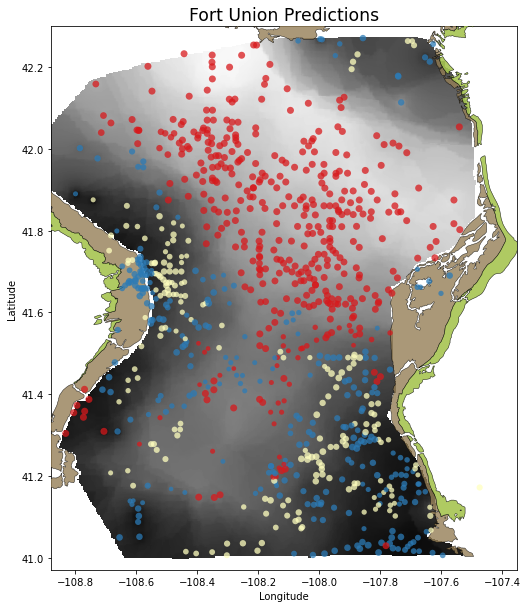

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
rasterio.plot.show(FU_BASE, ax=ax, cmap="gray", zorder=1)

TFUWELLS.plot(ax=ax, column="class", cmap=qualcmap, markersize=TFUWELLS.uncer*50, edgecolor='none', alpha=0.75, zorder=4)

kwarg2s = {"facecolor": "#957F56", "edgecolor": "black", "linewidth": 0.5, "hatch": ""}
FTUN.plot(ax=ax, zorder=3, label="Fort Union Outcrop", alpha=0.8, **kwarg2s)
kwarg3s = {"facecolor": "#A6C551", "edgecolor": "black", "linewidth": 0.5, "hatch": ""}
LANCE.plot(ax=ax, **kwarg3s, zorder=3, alpha=0.9)

plt.title("Fort Union Predictions", size="xx-large")
plt.xlim(-108.88, -107.35)
plt.ylim(40.97, 42.3)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
# plt.savefig('ftunion.pdf', bbox_inches='tight')

(-0.5, 0.5)

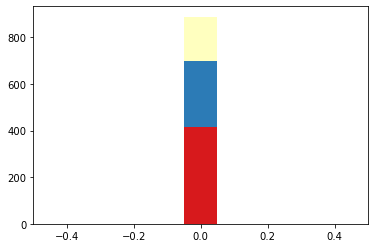

In [9]:
horizontal =  TFUWELLS['class'].value_counts()[0]
onlap =  TFUWELLS['class'].value_counts()[1]
truncation =  TFUWELLS['class'].value_counts()[2]
p0 = plt.bar(0, horizontal, 0.1, color=HORIZ_COLOR)
p1 = plt.bar(0, onlap, 0.1, bottom=horizontal, color=ONLAP_COLOR)
p2 = plt.bar(0, truncation, 0.1, bottom=horizontal+onlap, color=TRUNCATION_COLOR)
plt.xlim(-0.5,0.5)
# plt.savefig('ftunion_counts.pdf')

In [10]:
print(TFUWELLS[TFUWELLS['class']==0].uncer.mean(), TFUWELLS[TFUWELLS['class']==1].uncer.mean(), TFUWELLS[TFUWELLS['class']==2].uncer.mean())

0.9334226868673385 0.7204610198729499 0.7020558244563857


In [11]:
print(horizontal, onlap, truncation)

416 284 188


No handles with labels found to put in legend.


Text(65.81987728580768, 0.5, 'Northing (m)')

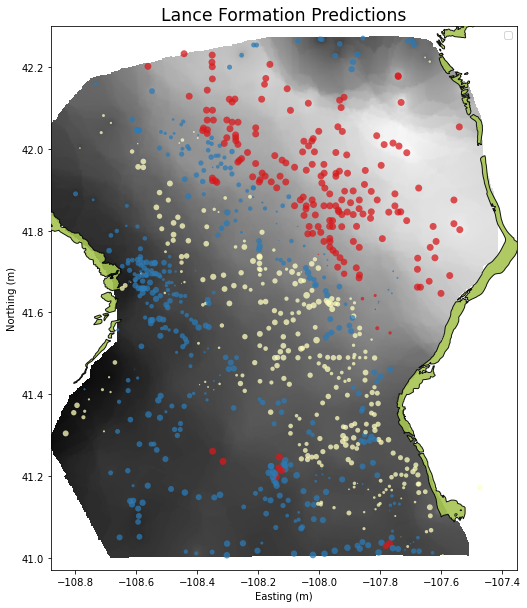

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))
rasterio.plot.show(LA_BASE, ax=ax, cmap="gray", zorder=1)

KLAWELLS.plot(ax=ax, column="class", cmap=qualcmap, markersize=KLAWELLS.uncer*50, edgecolor='none', alpha=0.75, zorder=4)
LANCE.plot(ax=ax, color="#A6C551", edgecolor="black", zorder=3, alpha=0.9)
plt.legend()
plt.title("Lance Formation Predictions", size="xx-large")
plt.xlim(-108.88, -107.35)
plt.ylim(40.97, 42.3)
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
# plt.savefig('lance.pdf', bbox_inches='tight')

(-0.5, 0.5)

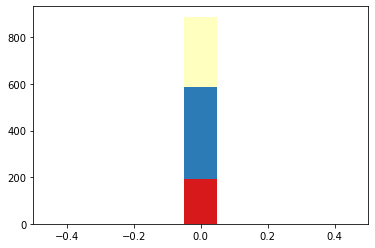

In [13]:
horizontal =  KLAWELLS['class'].value_counts()[0]
onlap =  KLAWELLS['class'].value_counts()[1]
truncation =  KLAWELLS['class'].value_counts()[2]
p0 = plt.bar(0, horizontal, 0.1, color=HORIZ_COLOR)
p1 = plt.bar(0, onlap, 0.1, bottom=horizontal, color=ONLAP_COLOR)
p2 = plt.bar(0, truncation, 0.1, bottom=horizontal+onlap, color=TRUNCATION_COLOR)
plt.xlim(-0.5,0.5)
# plt.savefig('lance_counts.pdf')

In [14]:
print(horizontal, onlap, truncation)

190 396 302


In [15]:
print(KLAWELLS[KLAWELLS['class']==0].uncer.mean(), KLAWELLS[KLAWELLS['class']==1].uncer.mean(), KLAWELLS[KLAWELLS['class']==2].uncer.mean())

0.9273605625812671 0.5080354764149365 0.41930442355333775
